# Système linéaire implicite et explicite Max-Plus


Tout comme la boîte à outils Scilab, une structure Max-Plus pour Julia est proposée afin de manipuler des systèmes dynamiques linéaires implicites sous la forme suivante :

$$\left \{ \begin{array}{l}
X(n) &= D X(n) \oplus A X(n-1) \oplus B U(n) \\
Y(n) &= C X(n)
\end{array} \right.$$

Avec $x(0) = x_0$ connu. Le quintuplé $(A,B,C,D,x_0)$ est manipulé par la structure `MPSysLin`. Le ⊗ est implicite pour plus de lisibilité. Ce document fait suite à [l'introduction de la boîte à outil Julia pour l'algèbre Max-Plus](https://nbviewer.jupyter.org/github/Lecrapouille/MaxPlus.jl/blob/master/tutorial/core-fr.ipynb) et nous verrons comment manipuler cette structure qui sera utilisée sur un problème concret dans le [document suivant](https://nbviewer.jupyter.org/github/Lecrapouille/MaxPlus.jl/blob/master/tutorial/flowshop-fr.ipynb).

# Prérequis

Si ce n'est pas déjà fait, chargeons la boîte à outils Max-Plus. Pour rappel, le document précédent explique plus longuement comment faire. 

In [1]:
push!(LOAD_PATH, pwd())
using MaxPlus, SparseArrays

Toujours pour des soucis d'appel à fonction `Base.show` depuis un document Jupyter, nous forçons l'affichage en mode plein :

In [2]:
Base.show(io::IO, ::MIME"text/latex", x::MP) = show(io, MIME"text/plain", x)
Base.show(io::IO, ::MIME"text/latex", A::MPAbstractVecOrMat) = show(io, MIME"text/plain", A)
Base.show(io::IO, ::MIME"text/latex", S::MPSysLin) = show(io, MIME"text/plain", S)

## Construction d'un système linéaire implicite Max-Plus

Créons notre premier système linéaire Max-Plus implicite grâce aux constructeurs de la structure Julia associés `MPSysLin(A, B, C [,D, x0])` :

$$S_1=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

La matrice $D$ et le vecteur $x_0$ sont optionnels. S'ils ne sont pas donnés ils seront automatiquement créés et remplis de $\varepsilon$.

In [3]:
speye(MP,2,2)

2×2 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [2, 2]  =  0

In [4]:
S1 = MPSysLin(MP([1 2; 3 4]),      # A
              MP([0;0]),           # B
              MP([0 0]),           # C
              speye(MP,2,2),       # D (optionel)
              spzeros(MP,2,1))     # x0 (optionel)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


Et le deuxième système implicite :

$$S_2=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . \\
. & 0 & . \\
. & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

In [5]:
S2 = MPSysLin(MP([1 2 3; 4 5 6; 7 8 9]),  # A
              MP([0;0;0]),                # B
              MP([0 0 0]),                # C
              eye(MP,3,3))                # D
                                          # x0 to zeros vector

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 3×3 (max,+) dense matrix:
  0   .   .
  .   0   .
  .   .   0

A = 3×3 (max,+) dense matrix:
  1   2   3
  4   5   6
  7   8   9

B = 3-element (max,+) vector:
  0
  0
  0

C = 1×3 (max,+) dense matrix:
  0   0   0

x0 = 3×1 (max,+) dense matrix:
  .
  .
  .


## Accès aux matrices

Ce fait directement par les champs .D .A .B .C .x0

In [6]:
S1.D

2×2 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [2, 2]  =  0

In [7]:
S1.A

2×2 (max,+) dense matrix:
  1   2
  3   4


In [8]:
S1.B

2-element (max,+) vector:
  0
  0


In [9]:
S1.C

1×2 (max,+) dense matrix:
  0   0


In [10]:
S1.x0

2×1 (max,+) sparse matrix with 0 stored entries

In [11]:
full(S1.x0)

2×1 (max,+) dense matrix:
  .
  .


## Affichage de systèmes implicites Max-Plus

### Affichage sortie standard

In [12]:
tropshow(stdout, S1)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


In [13]:
show(stdout, "text/plain", S1)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


### Affichage de systèmes implicites Max-Plus en $\LaTeX$

Comme l'affichage précédent n'est pas le plus amicale, on peut améliorer ça en générant du code $\LaTeX$ soit avec la fonction `LaTeX` (et si l'on ne passe pas l'argument `IO` alors une chaîne de caractère sera retournée) soit via la fonction `Base.show` en passant l'argument `::MIME"text/latex"` :

In [14]:
LaTeX(stdout, S1)  # show(stdout, "text/latex", S1)

"\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 \\\\\n3 & 4 \\\\\n\\end{array}\n\\right]\n x_{n-1} \\oplus \\left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right."

Ce qui donnera une fois compilée :
$$\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

Pour la suite de ce document Jupyter, on va se créer une fonction qui forcera l'affichage LaTeX :

In [15]:
using LaTeXStrings

latexify(S1, name="S") = latexstring(name, "=", LaTeX(S1))

latexify (generic function with 2 methods)

In [16]:
latexify(S1)

L"$S=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\ y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\ x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$"

## Composition de systèmes implicites Max-Plus

Tout comme Scilab, Julia permet de surcharger des opérateurs de base, que l'on utilisera pour composer des systèmes linéaires.

#### Composition parallèle

In [17]:
S = S1 + S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Composition diagonale

In [18]:
S = S1 | S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 146 bytes ⋯ ". \\\\\n. & 0 \\\\\n. & 0 \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n. & . & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Composition en série

In [19]:
S = S1 * S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n0 & 0 & 0 & 0 & . \\\\\n0 & 0 & 0 & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & 3 & . & . \\\\\n4 & 5 & 6 & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n. & . & . & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Entrées communes

In [20]:
S = [S1 S2]; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 125 bytes ⋯ "*{20}c}\n0 & . \\\\\n0 & . \\\\\n. & 0 \\\\\n. & 0 \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Sorties communes

In [21]:
S = [S1; S2]; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 126 bytes ⋯ "{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n. & . & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Composition avec retro-action

In [22]:
S = S1 / S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & 0 & 0 & 0 \\\\\n. & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & . & . \\\\\n0 & 0 & . & 0 & . \\\\\n0 & 0 & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

## Conversion système implicte Max-Plus vers système explicite Max-Plus

In [23]:
# TODO S = mpexplicit(S1); latexify(S)

## Simulation de système linéaire Max-Plus

La fonction `mpsimul` permet de retourner les états $X(n)$ (ou bien le dernier état) d'un système linéaire Max-Plus en injectant des données $U(n)$ Max-Plus sous la forme d'un vecteur.

In [24]:
u = Vector(MP(1:0.5:5))
y = mpsimul(S, u, true) # Retourne l'historiques des états

9×1 (max,+) dense matrix:
   2
   6
  10
  14
  18
  22
  26
  30
  34


In [25]:
mpsimul(S, u, false) # Retourne le dernier état calculé

1-element (max,+) vector:
  34


On peut ploter le résultat directement les nombres Max-Plus.

In [26]:
using Plots

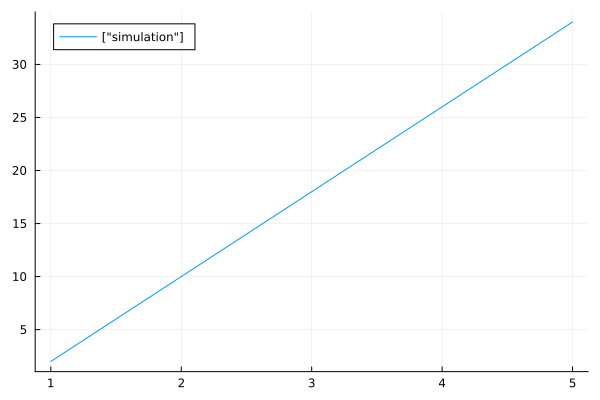

In [27]:
plot(u, y, label=["simulation"], legend=:topleft)

Autre exemple, système avec des entrées communes :

In [28]:
u = [MP(1:0.5:5) MP(1:0.5:5)]
y = mpsimul([S1 S2], u, true)

9×1 (max,+) dense matrix:
   2
  11
  20
  29
  38
  47
  56
  65
  74
